In [1]:
from keras.models import Sequential
from keras.layers.core import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import TensorBoard

from time import time 

import pandas as pd
import numpy as np
import tensorflow as tf
import sklearn
  
# seed 값 설정
np.random.seed(3)
tf.random.set_seed(3)

In [2]:
# 데이터 입력
df = pd.read_csv('../dataset/sonar.csv', header=None)

In [3]:
# seed 값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

df = pd.read_csv('../dataset/sonar.csv', header=None)
dataset = df.values
X = dataset[:,0:60].astype(float)
Y_obj = dataset[:,60]

e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)

In [4]:
# 학습셋과 테스트셋의 구분

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=seed)
model = Sequential()
model.add(Dense(24, input_dim=60, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

tensorboard = TensorBoard(log_dir='logs\{}'.format(time()))
model.fit(X_train, Y_train, epochs=130, batch_size=5, callbacks=[tensorboard])

Epoch 1/130
 1/29 [>.............................] - ETA: 0s - loss: 0.2464 - accuracy: 0.6000WARNING:tensorflow:From C:\Users\asus\anaconda3\envs\django3\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
29/29 [==============================] - 0s 1ms/step - loss: 0.2472 - accuracy: 0.4897
Epoch 2/130
29/29 [==============================] - 0s 678us/step - loss: 0.2317 - accuracy: 0.6414
Epoch 3/130
29/29 [==============================] - 0s 655us/step - loss: 0.2241 - accuracy: 0.6207
Epoch 4/130
29/29 [==============================] - 0s 695us/step - loss: 0.2139 - accuracy: 0.6897
Epoch 5/130
29/29 [==============================] - 0s 650us/step - loss: 0.2034 - accuracy: 0.7379
Epoch 6/130
29/29 [==============================] - 0s 690us/step - loss: 0.1925 - accuracy: 0.7517
Epoch 7/130
29/29 [=

# 모델 저장과 재사용

In [5]:
from keras.models import load_model
# model folder 만들기
model.save('model/sonar.h5')

In [6]:
del model
model = load_model('model/sonar.h5')

In [7]:
# 테스트셋에 모델 적용
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

2/2 [==============================] - 0s 499us/step - loss: 0.1447 - accuracy: 0.8571

 Test Accuracy: 0.8571


In [8]:
# accuracy: 0.8571

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 24)                1464      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                250       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 1,725
Trainable params: 1,725
Non-trainable params: 0
_________________________________________________________________


In [10]:
# TensorBoard => logs folder 만들기


# K-Fold Cross Validation (k겹 교차 검증)
- data: 70% train set & 30% test set => not enough test set
- 단점을 보완
- 데이터의 100%를 테스트셋으로 사용
- ex: 5겹 교차 검증(5-fold cross validation)

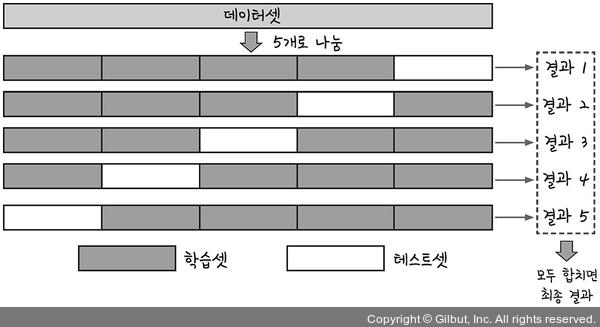

In [11]:
from sklearn.model_selection import StratifiedKFold
# 데이터를 원하는 숫자만큼 쪼개 => 각각 Train Set & Test Set 으로 사용되게 만드는 함수

n_fold = 10 # 10개의 파일로 쪼개 테스트하는 10겹 교차 검증(10-fold cross validation)
skf = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=seed)

In [12]:
accuracy = []

In [13]:
# for 구문으로 묶어 n_fold만큼 반복

# train & test => index 뽑아 내는 것 
for train, test in skf.split(X, Y):
    model = Sequential()
    model.add(Dense(24, input_dim=60, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
    model.fit(X[train], Y[train], epochs=100, batch_size=5)
    k_accuracy = "%.4f" % (model.evaluate(X[test], Y[test])[1])
    accuracy.append(k_accuracy)

Epoch 1/100
38/38 [==============================] - 0s 710us/step - loss: 0.2574 - accuracy: 0.5187
Epoch 2/100
38/38 [==============================] - 0s 658us/step - loss: 0.2413 - accuracy: 0.6578
Epoch 3/100
38/38 [==============================] - 0s 658us/step - loss: 0.2352 - accuracy: 0.6150
Epoch 4/100
38/38 [==============================] - 0s 619us/step - loss: 0.2281 - accuracy: 0.7166
Epoch 5/100
38/38 [==============================] - 0s 632us/step - loss: 0.2161 - accuracy: 0.7487
Epoch 6/100
38/38 [==============================] - 0s 658us/step - loss: 0.2016 - accuracy: 0.7647
Epoch 7/100
38/38 [==============================] - 0s 658us/step - loss: 0.1910 - accuracy: 0.7807
Epoch 8/100
38/38 [==============================] - 0s 632us/step - loss: 0.1798 - accuracy: 0.8021
Epoch 9/100
38/38 [==============================] - 0s 658us/step - loss: 0.1691 - accuracy: 0.7968
Epoch 10/100
38/38 [==============================] - 0s 632us/step - loss: 0.1594 - accura

In [14]:
print("\n %.f fold accuracy:" % n_fold, accuracy)


 10 fold accuracy: ['0.7619', '0.7619', '0.7619', '0.8571', '0.8095', '0.7619', '0.9524', '0.8571', '0.9500', '0.8500']
